Libraries imported successfully.
Dataset 'bank-full.csv' loaded successfully.
Data shape: (45211, 17)
Numerical features: ['age', 'balance']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan']
'unknown' values cleaned.
Preprocessing pipelines created.
--- Preprocessing Successful ---
Shape of processed data: (45211, 25)

Generating Screenshot 1: Feature Correlation Matrix...


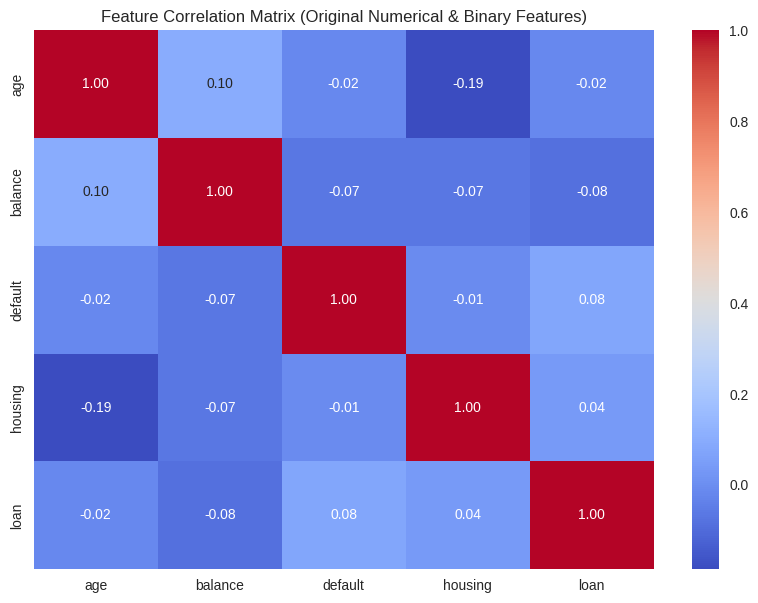


Applying PCA...
--- PCA Results (for Analysis Question 1) ---
Explained variance by PC1: 0.2490 (24.90%)
Explained variance by PC2: 0.1997 (19.97%)
Total variance captured by first two components: 0.4487 (44.87%)

Generating Screenshot 2: PCA Visualization...


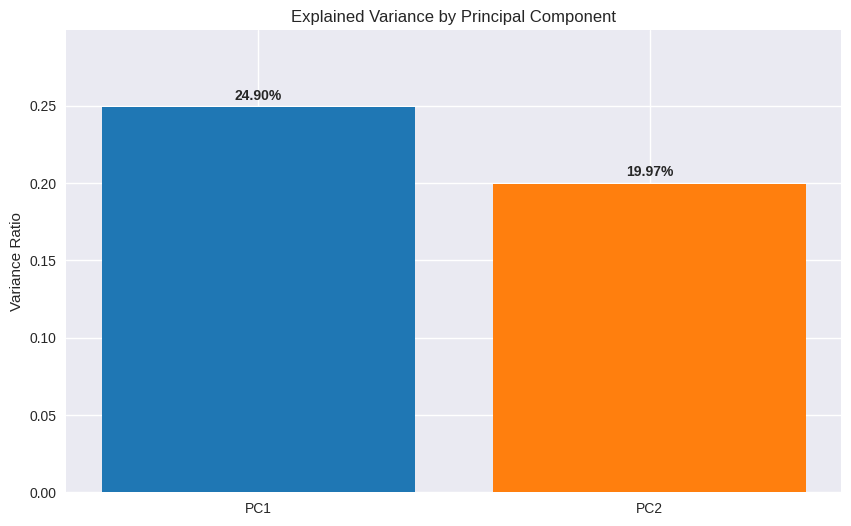

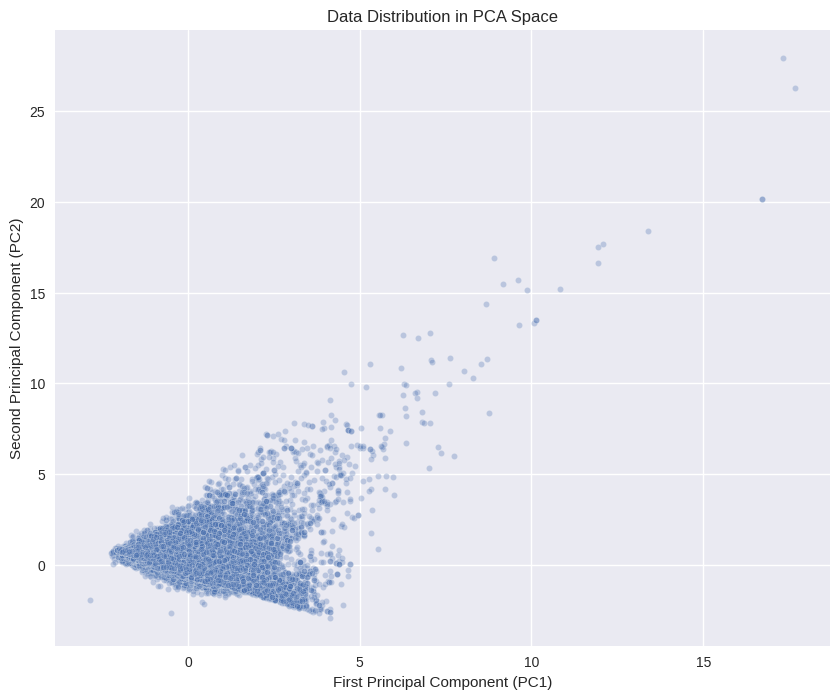


--- Calculating Inertia and Silhouette Scores (k=2 to 10) ---
Running K-means for k=2...
Running K-means for k=3...
Running K-means for k=4...
Running K-means for k=5...
Running K-means for k=6...
Running K-means for k=7...
Running K-means for k=8...
Running K-means for k=9...
Running K-means for k=10...

Generating Screenshot 3: Optimal 'k' Plots...


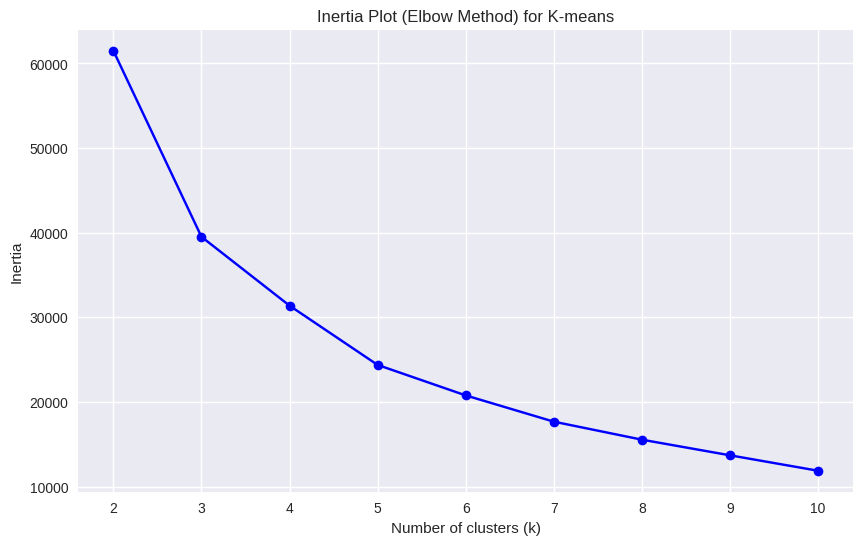

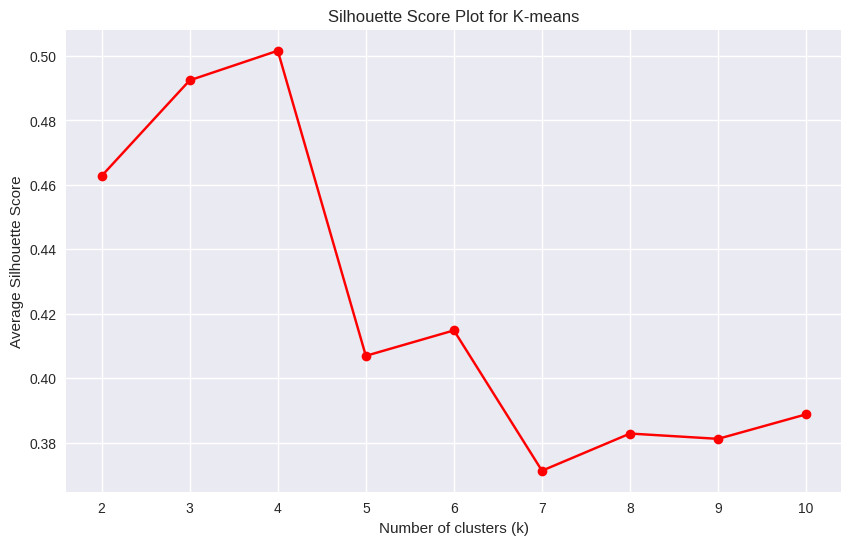


--- Running Final K-means Model (k=4) ---
K-means (k=4) Average Silhouette Score: 0.5017

Generating Screenshot 4: K-means Results...


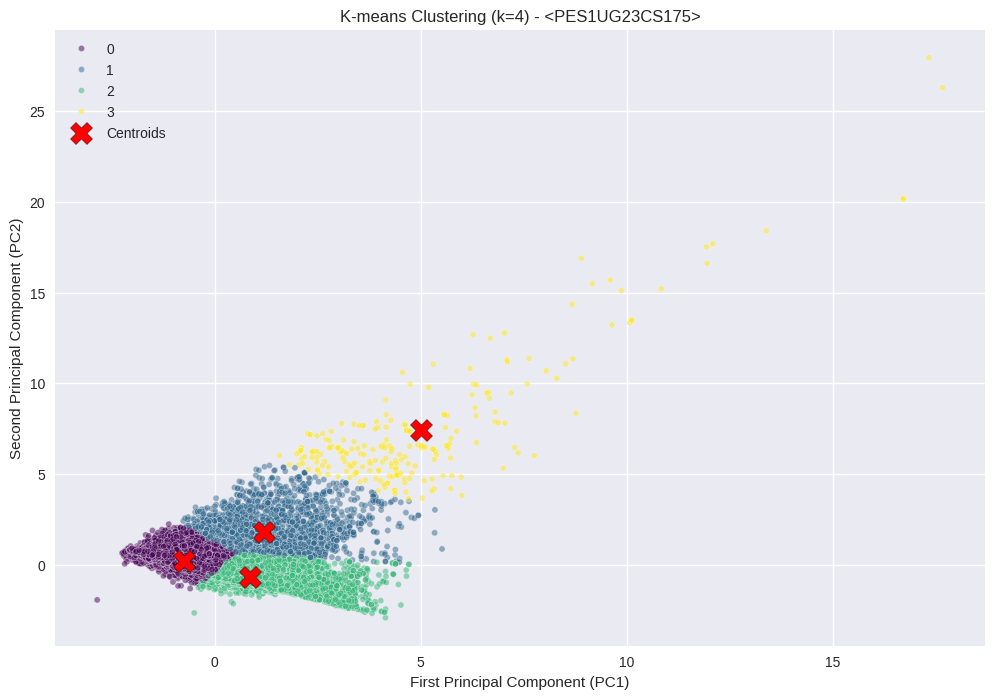

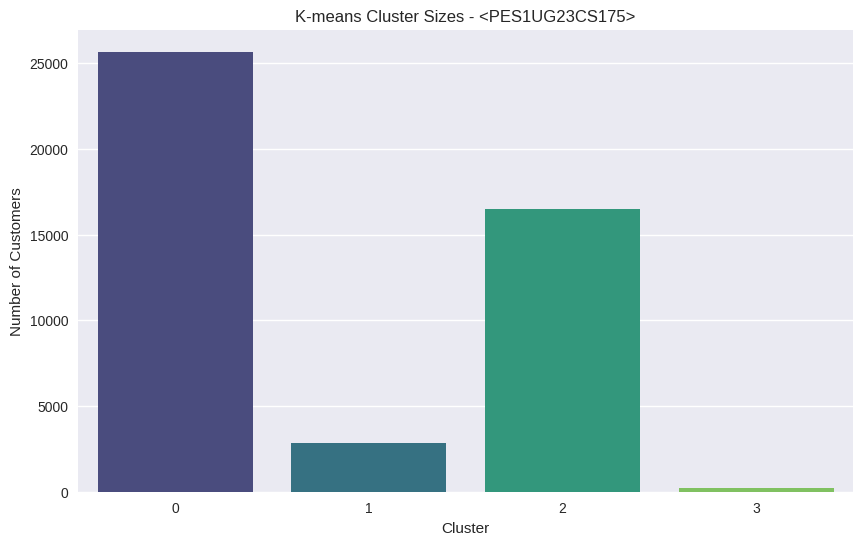

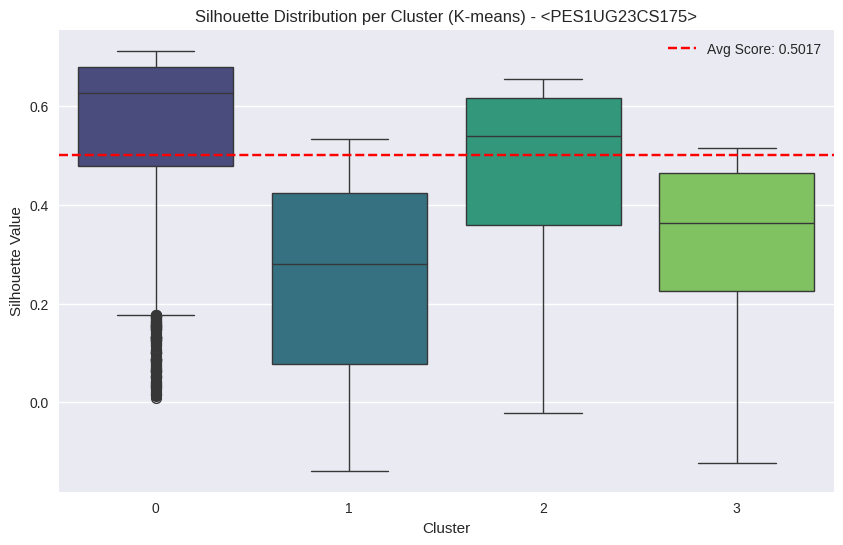


--- Running Bisecting K-means Model (k=4) ---
Bisecting K-means (k=4) Average Silhouette Score: 0.4616

Generating Bisecting K-means Results (for Analysis)...


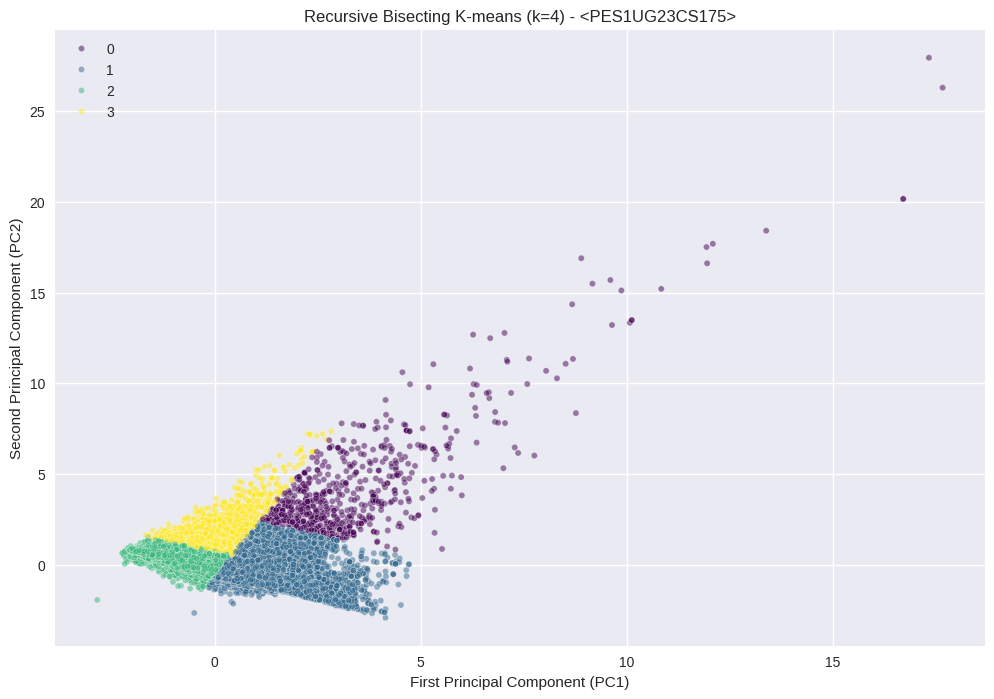

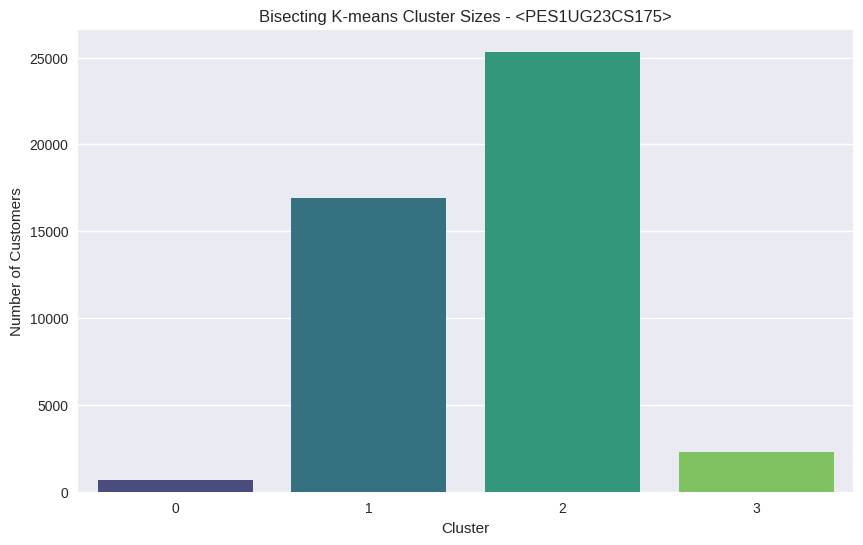

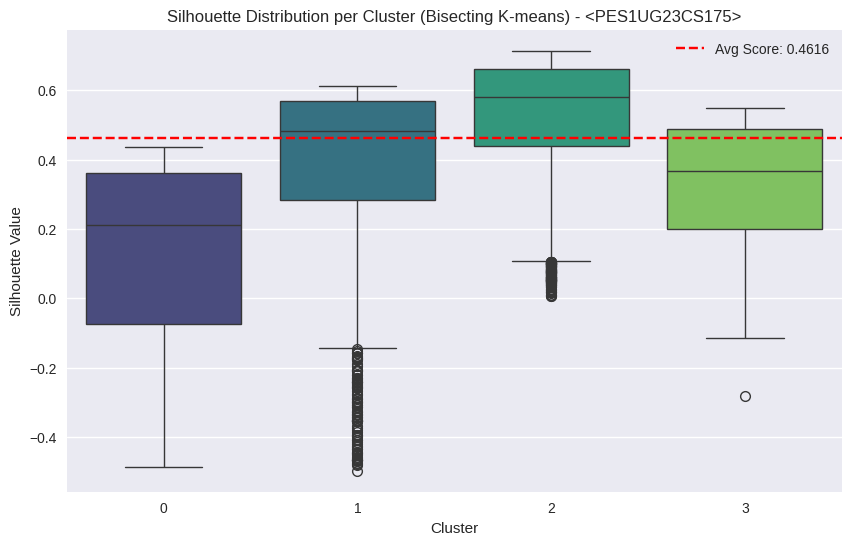


--- Lab Complete. All cells are ready to execute. ---


In [ ]:
# ----------------------------------------------------------------------
# Cell 1: Imports
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

print("Libraries imported successfully.")

# ----------------------------------------------------------------------
# Cell 2: Load Dataset
# ----------------------------------------------------------------------
try:
    df = pd.read_csv("bank-full.csv", delimiter=';')
    print("Dataset 'bank-full.csv' loaded successfully.")
    print(f"Data shape: {df.shape}")
except Exception as e:
    print(f"Error loading 'bank-full.csv'. Make sure the file is in the same directory.")
    print(f"Error: {e}")

# ----------------------------------------------------------------------
# Cell 3: Preprocessing - Feature Selection and Cleaning
# ----------------------------------------------------------------------
# TODO: Select features, identify types, and clean 'unknown' values
if 'df' in locals():
    data = df.copy()

    # 1. Define features to use for clustering (customer profile)
    profile_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']
    data = data[profile_features]

    # 2. Identify categorical and numerical features
    numerical_features = data.select_dtypes(include=['int64']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()
    print(f"Numerical features: {numerical_features}")
    print(f"Categorical features: {categorical_features}")

    # 3. Handle 'unknown' values in categorical features
    # We replace 'unknown' with the mode (most frequent value)
    for col in ['job', 'education']:
        mode_val = data[col].mode()[0]
        data[col] = data[col].replace('unknown', mode_val)
    print("'unknown' values cleaned.")

# ----------------------------------------------------------------------
# Cell 4: Preprocessing - Create Pipelines
# ----------------------------------------------------------------------
if 'data' in locals():
    # Pipeline for numerical features: scaling
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Pipeline for categorical features: one-hot encoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Use ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    print("Preprocessing pipelines created.")

# ----------------------------------------------------------------------
# Cell 5: Preprocessing - Fit and Transform Data
# ----------------------------------------------------------------------
# TODO: Apply the preprocessing pipelines
if 'preprocessor' in locals():
    processed_data = preprocessor.fit_transform(data)

    # Get feature names after one-hot encoding for clarity
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(cat_feature_names)

    # Convert processed data back to a DataFrame
    processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

    print("--- Preprocessing Successful ---")
    print(f"Shape of processed data: {processed_df.shape}")

# ----------------------------------------------------------------------
# Feature Correlation Matrix
# ----------------------------------------------------------------------
# This is required for Deliverable 2
if 'df' in locals():
    print("\nGenerating Screenshot 1: Feature Correlation Matrix...")
    df_for_corr = df[['age', 'balance']].copy()
    binary_cols = ['default', 'housing', 'loan']
    for col in binary_cols:
        df_for_corr[col] = df[col].map({'yes': 1, 'no': 0})

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_for_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix (Original Numerical & Binary Features)')
    plt.show()

# ----------------------------------------------------------------------
# Dimensionality Reduction (PCA)
# ----------------------------------------------------------------------
# TODO: Apply PCA to reduce dimensions
if 'processed_df' in locals():
    print("\nApplying PCA...")
    pca = PCA(n_components=2, random_state=42)
    pca_data = pca.fit_transform(processed_df)

    # Convert to DataFrame for plotting
    pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    total_variance = np.sum(explained_variance)

    print(f"--- PCA Results (for Analysis Question 1) ---")
    print(f"Explained variance by PC1: {explained_variance[0]:.4f} ({explained_variance[0]:.2%})")
    print(f"Explained variance by PC2: {explained_variance[1]:.4f} ({explained_variance[1]:.2%})")
    print(f"Total variance captured by first two components: {total_variance:.4f} ({total_variance:.2%})")

# ----------------------------------------------------------------------
# PCA Visualization
# ----------------------------------------------------------------------
# This is required for Deliverable 2
if 'pca_df' in locals():
    print("\nGenerating Screenshot 2: PCA Visualization...")
    # Plot 'Explained variance by Component'
    plt.figure(figsize=(10, 6))
    components = ['PC1', 'PC2']
    plt.bar(components, explained_variance, color=['#1f77b4', '#ff7f0e'])
    plt.title('Explained Variance by Principal Component')
    plt.ylabel('Variance Ratio')
    plt.ylim(0, max(explained_variance) * 1.2)
    for i, v in enumerate(explained_variance):
        plt.text(i, v + 0.005, f"{v:.2%}", ha='center', fontweight='bold')
    plt.show()

    # Plot 'Data Distribution in PCA Space'
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.3, s=20)
    plt.title('Data Distribution in PCA Space')
    plt.xlabel('First Principal Component (PC1)')
    plt.ylabel('Second Principal Component (PC2)')
    plt.grid(True)
    plt.show()

# ----------------------------------------------------------------------
# Find Optimal 'k'
# ----------------------------------------------------------------------
# TODO: Calculate Inertia and Silhouette scores for a range of k
if 'pca_df' in locals():
    print("\n--- Calculating Inertia and Silhouette Scores (k=2 to 10) ---")
    # Use the PCA-transformed data for clustering
    data_for_clustering_k = pca_df.copy()

    # Sample data for silhouette score calculation (45k is too slow)
    sample_data_k = data_for_clustering_k.sample(n=10000, random_state=42)

    k_range = range(2, 11)
    inertia_values = []
    silhouette_scores = []

    for k in k_range:
        print(f"Running K-means for k={k}...")
        kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)

        # Fit on full PCA data for inertia
        kmeans_k.fit(data_for_clustering_k)
        inertia_values.append(kmeans_k.inertia_)

        # Calculate silhouette score on the sample data
        labels_k = kmeans_k.predict(sample_data_k)
        silhouette_avg = silhouette_score(sample_data_k, labels_k)
        silhouette_scores.append(silhouette_avg)

# ----------------------------------------------------------------------
# Plot 'k' Search Results
# ----------------------------------------------------------------------
# This is required for Deliverable 2
if 'inertia_values' in locals():
    print("\nGenerating Screenshot 3: Optimal 'k' Plots...")
    # Plot 'Inertia Plot' (Elbow Method)
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_values, 'bo-')
    plt.title('Inertia Plot (Elbow Method) for K-means')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Plot 'Silhouette Score Plot'
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.title('Silhouette Score Plot for K-means')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

# ----------------------------------------------------------------------
# Final K-means Model
# ----------------------------------------------------------------------
# TODO: Run final K-means model with optimal k
if 'pca_df' in locals():
    # Based on the plots, k=4 has a clear elbow and the highest silhouette score.
    optimal_k = 4

    # !!! IMPORTANT: REPLACE THIS WITH YOUR SRN !!!
    SRN = "<PES1UG23CS175>"

    # Create clean copies for final models
    data_for_clustering = pca_df.copy()
    sample_data = data_for_clustering.sample(n=10000, random_state=42)

    # --- K-means Model ---
    print(f"\n--- Running Final K-means Model (k={optimal_k}) ---")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans.fit(data_for_clustering)
    kmeans_labels = kmeans.predict(data_for_clustering)
    kmeans_centroids = kmeans.cluster_centers_

    # Calculate final silhouette score on the sample
    sample_labels_kmeans = kmeans.predict(sample_data)
    kmeans_avg_silhouette = silhouette_score(sample_data, sample_labels_kmeans)
    print(f"K-means (k=4) Average Silhouette Score: {kmeans_avg_silhouette:.4f}")

    # Add labels to the plotting DataFrame
    pca_df['kmeans_cluster'] = kmeans_labels

# ----------------------------------------------------------------------
# K-means Visualization
# ----------------------------------------------------------------------
# This is required for Deliverable 2
if 'kmeans' in locals():
    print("\nGenerating Screenshot 4: K-means Results...")
    # Plot 1: K-means Clustering Results with Centroids
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', alpha=0.5, s=20)
    plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=250, c='red', marker='X', label='Centroids', edgecolors='black')
    plt.title(f'K-means Clustering (k={optimal_k}) - {SRN}')
    plt.xlabel('First Principal Component (PC1)')
    plt.ylabel('Second Principal Component (PC2)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: K-means Cluster Sizes
    plt.figure(figsize=(10, 6))
    cluster_sizes_kmeans = pd.Series(kmeans_labels).value_counts().sort_index()
    sns.barplot(x=cluster_sizes_kmeans.index, y=cluster_sizes_kmeans.values, palette='viridis')
    plt.title(f'K-means Cluster Sizes - {SRN}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()

    # Plot 3: Silhouette Distribution for K-means
    silhouette_vals_kmeans = silhouette_samples(sample_data, sample_labels_kmeans)
    silhouette_df_kmeans = pd.DataFrame({'Silhouette Value': silhouette_vals_kmeans, 'Cluster': sample_labels_kmeans})
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=silhouette_df_kmeans, x='Cluster', y='Silhouette Value', palette='viridis')
    plt.axhline(y=kmeans_avg_silhouette, color='red', linestyle='--', label=f'Avg Score: {kmeans_avg_silhouette:.4f}')
    plt.title(f'Silhouette Distribution per Cluster (K-means) - {SRN}')
    plt.legend()
    plt.show()

# ----------------------------------------------------------------------
# Final Bisecting K-means Model
# ----------------------------------------------------------------------
# TODO: Run Recursive Bisecting K-means for comparison
if 'data_for_clustering' in locals():
    print(f"\n--- Running Bisecting K-means Model (k={optimal_k}) ---")
    bisect_kmeans = BisectingKMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    bisect_kmeans.fit(data_for_clustering)
    bisect_labels = bisect_kmeans.predict(data_for_clustering)

    # Calculate final silhouette score on the sample
    sample_labels_bisect = bisect_kmeans.predict(sample_data)
    bisect_avg_silhouette = silhouette_score(sample_data, sample_labels_bisect)
    print(f"Bisecting K-means (k=4) Average Silhouette Score: {bisect_avg_silhouette:.4f}")

    # Add labels to the plotting DataFrame
    pca_df['bisect_cluster'] = bisect_labels

# ----------------------------------------------------------------------
# Bisecting K-means Visualization
# ----------------------------------------------------------------------
if 'bisect_kmeans' in locals():
    print("\nGenerating Bisecting K-means Results (for Analysis)...")
    # Plot 1: Bisecting K-means Clustering Results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='bisect_cluster', palette='viridis', alpha=0.5, s=20)
    plt.title(f'Recursive Bisecting K-means (k={optimal_k}) - {SRN}')
    plt.xlabel('First Principal Component (PC1)')
    plt.ylabel('Second Principal Component (PC2)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Bisecting K-means Cluster Sizes
    plt.figure(figsize=(10, 6))
    cluster_sizes_bisect = pd.Series(bisect_labels).value_counts().sort_index()
    sns.barplot(x=cluster_sizes_bisect.index, y=cluster_sizes_bisect.values, palette='viridis')
    plt.title(f'Bisecting K-means Cluster Sizes - {SRN}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()

    # Plot 3: Silhouette Distribution for Bisecting K-means
    silhouette_vals_bisect = silhouette_samples(sample_data, sample_labels_bisect)
    silhouette_df_bisect = pd.DataFrame({'Silhouette Value': silhouette_vals_bisect, 'Cluster': sample_labels_bisect})
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=silhouette_df_bisect, x='Cluster', y='Silhouette Value', palette='viridis')
    plt.axhline(y=bisect_avg_silhouette, color='red', linestyle='--', label=f'Avg Score: {bisect_avg_silhouette:.4f}')
    plt.title(f'Silhouette Distribution per Cluster (Bisecting K-means) - {SRN}')
    plt.legend()
    plt.show()

print("\n--- Lab Complete. All cells are ready to execute. ---")